   Cell ID  RSRP (dBm)  SINR (dB)  CQI  \
0     1024         -95         10   12   
1     1025        -110          3    4   
2     1030         -85         15   15   
3     1027        -108          2    3   

                                            Warnings  
0                                   Good Performance  
1  Weak Signal (RSRP:-110 dBm), High Interference...  
2                                   Good Performance  
3  Weak Signal (RSRP:-108 dBm), High Interference...  


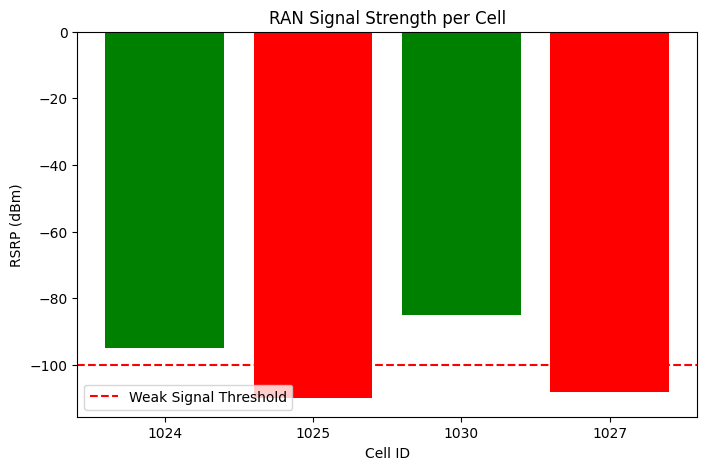

In [2]:
import re #regular expression for log extraction
import pandas as pd
import matplotlib.pyplot as plt
# Sample RAN log data
ran_logs = [
    "[2025-02-24 14:35:10] Cell ID: 1024, RSRP: -95 dBm, SINR: 10 dB, CQI: 12",
    "[2025-02-24 14:35:11] Cell ID: 1025, RSRP: -110 dBm, SINR: 3 dB, CQI: 4",
    "[2025-02-24 14:35:12] Cell ID: 1030, RSRP: -85 dBm, SINR: 15 dB, CQI: 15",
    "[2025-02-24 14:35:13] Cell ID: 1027, RSRP: -108 dBm, SINR: 2 dB, CQI: 3"
]
RSRP_THRESHOLD = -100 #dBm
SINR_THRESHOLD = 5 #dB
CQI_THRESHOLD = 5
def analyze_ran_logs(logs):
    results = []
    for log in logs:
       match = re.search(r"Cell ID: (\d+), RSRP: (-\d+) dBm, SINR: (\d+) dB, CQI: (\d+)", log)

       if match:
            cell_id = int(match.group(1))
            rsrp = int(match.group(2))
            sinr = int(match.group(3))
            cqi = int(match.group(4))
            warnings = []
            if rsrp<RSRP_THRESHOLD:
                warnings.append(f"Weak Signal (RSRP:{rsrp} dBm)")
                if sinr<SINR_THRESHOLD:
                          warnings.append(f"High Interference (SINR: {sinr} dB)")
            if cqi < CQI_THRESHOLD:
                warnings.append(f"Poor Channel Quality (CQI: {cqi})")

            # Store results
            results.append({
                "Cell ID": cell_id,
                "RSRP (dBm)": rsrp,
                "SINR (dB)": sinr,
                "CQI": cqi,
                "Warnings": ", ".join(warnings) if warnings else "Good Performance"
            })

    return results

# Analyze the logs
ran_analysis_results = analyze_ran_logs(ran_logs)

# Convert results to DataFrame for easy viewing
df = pd.DataFrame(ran_analysis_results)

# Print the DataFrame
print(df)

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(df["Cell ID"].astype(str), df["RSRP (dBm)"], color=['green' if rsrp >= -100 else 'red' for rsrp in df["RSRP (dBm)"]])
plt.xlabel("Cell ID")
plt.ylabel("RSRP (dBm)")
plt.title("RAN Signal Strength per Cell")
plt.axhline(y=-100, color='r', linestyle='--', label="Weak Signal Threshold")
plt.legend()
plt.show()